In [60]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_directory = 'C:\\Users\\Matheus\\.keras\\datasets\\manga'
tf.random.set_seed(42) 

In [61]:

# create new pictures

""" color_dir = data_directory
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
)
dir_It = datagen.flow_from_directory(
    color_dir,
    batch_size=32,
    save_to_dir=data_directory+"\\argurmented",
    save_prefix="",
    save_format='png',
)
for _ in range(5):
    img, label = dir_It.next() """
   




' color_dir = data_directory\ndatagen = tf.keras.preprocessing.image.ImageDataGenerator(\n    rescale=1./255,\n    rotation_range=180,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n)\ndir_It = datagen.flow_from_directory(\n    color_dir,\n    batch_size=32,\n    save_to_dir=data_directory+"\\argurmented",\n    save_prefix="",\n    save_format=\'png\',\n)\nfor _ in range(5):\n    img, label = dir_It.next() '

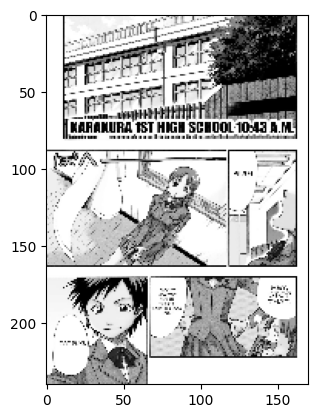

In [62]:
def resize_image(data):
    SIZE = [240,170]
    resized_img = tf.image.resize(
    images=data,
    size=SIZE,
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
    )
    return resized_img

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = resize_image(plt.imread(os.path.join(folder,filename)))
        if img is not None:
            images.append(img)
    return images

X_test = load_images_from_folder(data_directory + "\\test\\input")

y_test = load_images_from_folder(data_directory + "\\test\\output")

X_train = load_images_from_folder(data_directory + "\\train\\input")

y_train = load_images_from_folder(data_directory + "\\train\\output")


# read one img
""" data = plt.imread(data_directory + "\\test\\output\\22673-12227-009.jpg") """

#show one img
""" plt.imshow(np.array(data, dtype=int))
plt.show() """

# resize data if necessary
""" d=tf.image.resize(
    images=data,
    size=[700,700],
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
) """

plt.imshow(np.array(X_train[0], dtype=int))




In [65]:
model = tf.keras.Sequential([    
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(240,170,3)
    ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
]) 

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="Adam",
    metrics=["accuracy"]
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
)


Epoch 1/5


ValueError: in user code:

    File "C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Matheus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 216, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "sequential_2" expects 1 input(s), but it received 250 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 170, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 170, 3) dtype=float32>]
